In [1]:
# Load dir of the pklfile
pklfile_dir = './result/ADMIRE_resultdata_epoch_3_Test_data.pkl'
save_dir = pklfile_dir[:-4]

ims = [20,50,100]
also_save_img = False
# 备注：ims支持range表示，会自动转换，如[range(2,5),8,10]这样的输入是允许的

In [2]:
import matplotlib.pyplot as plt
from process.mapplot import plot_vector_field

def plot_result_drawer(path, iou, n, i1, mode, snake, snake_hist, GT, mapE, mapA, mapB, image, plot_force, gx=None, gy=None, Fu=None, Fv=None, alsosaveimg=False):
    if plot_force:
        fig0, (ax) = plt.subplots(ncols=6, nrows=1, figsize=(16, 6))
    else:
        fig0, (ax) = plt.subplots(ncols=4, nrows=1, figsize=(12, 6))
    im = ax[0].imshow(image[0,:,:],cmap='gray')
    for i in range(0, len(snake_hist), 10):
        ax[0].plot(snake_hist[i][1, :], snake_hist[i][0, :], '-.', color=[i / len(snake_hist), i / len(snake_hist), 1 - i / len(snake_hist)], lw=1)
    if not GT is None:
        ax[0].plot(GT[:, 1], GT[:, 0], '-', color=[0.2, 1, 0.2], lw=1)
    ax[0].plot(snake[:, 1], snake[:, 0], '--', lw=1, color=[1, 0, 0])
    ax[0].axis('off')
    ax[0].set_title(r'image', y=-0.3, fontsize=6)
    plt.colorbar(im, ax=ax[0], fraction=0.046, pad=0.04).remove()

    im0 = ax[1].imshow(mapE)
    plt.colorbar(im0, ax=ax[1], fraction=0.046, pad=0.04)
    ax[1].axis('off')
    ax[1].set_title(r'mapE', y=-0.3, fontsize=6)

    im2 = ax[2].imshow(mapB)
    plt.colorbar(im2, ax=ax[2], fraction=0.046, pad=0.04)
    ax[2].axis('off')
    ax[2].set_title(r'mapB', y=-0.3, fontsize=6)

    im3 = ax[3].imshow(mapA)
    plt.colorbar(im3, ax=ax[3], fraction=0.046, pad=0.04)
    ax[3].axis('off')
    ax[3].set_title(r'mapA', y=-0.3, fontsize=6)

    if plot_force:
        im_mixforce = plot_vector_field(ax[4],-(gx+Fu),-(gy+Fv), map=image[0,:,:], scalenum=10)
        ax[4].set_title('Force: CAT+grad', fontsize=6, y=-0.3)
        im_cat = plot_vector_field(ax[5], -gx, -gy, map=image[0,:,:], scalenum=25)
        ax[5].set_title('pure CAT', fontsize=6, y=-0.3)

    fig0.suptitle('mode:' + mode + ',epoch:' + str(n) + ',figure:' + str(i1) + ',iou = %.2f' % iou, fontsize=20)

    if alsosaveimg:
        plt.savefig(path + 'epoch-' + str(n) + '-' + mode + '-num-' + str(i1) + '.jpg', dpi=200)

    plt.show()
    plt.close()

读取数据文件： ./result/ADMIRE_resultdata_epoch_3_Test_data.pkl
正在绘制的图片序号： [20, 50, 100]


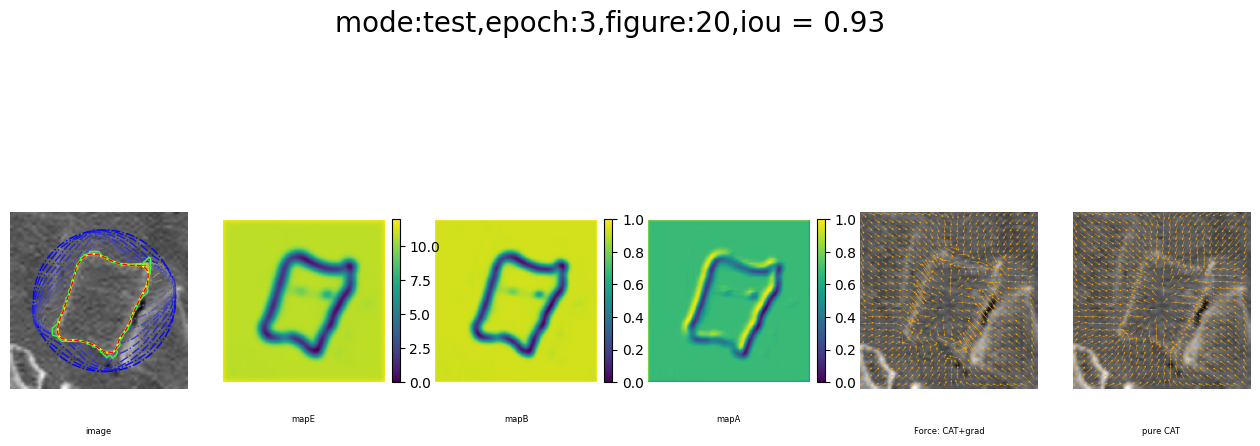

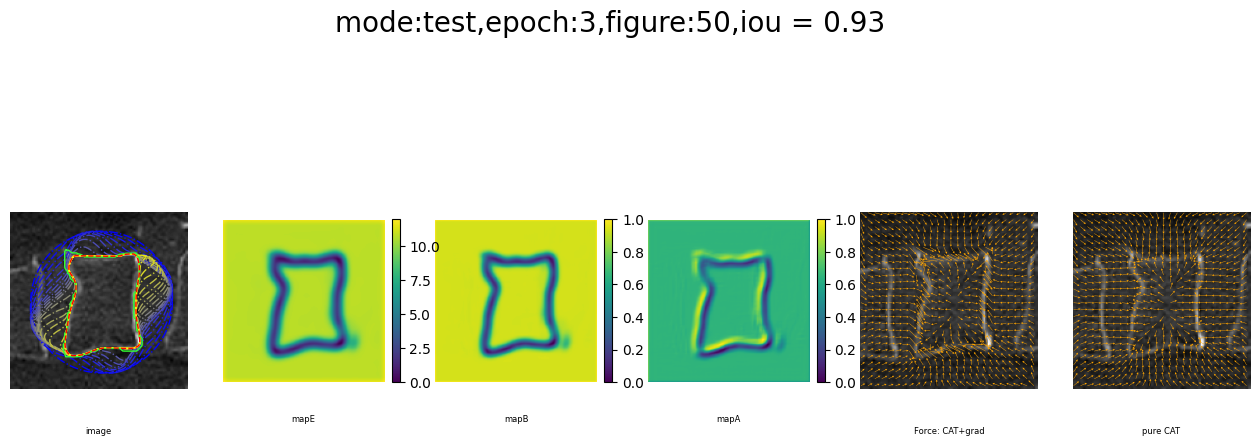

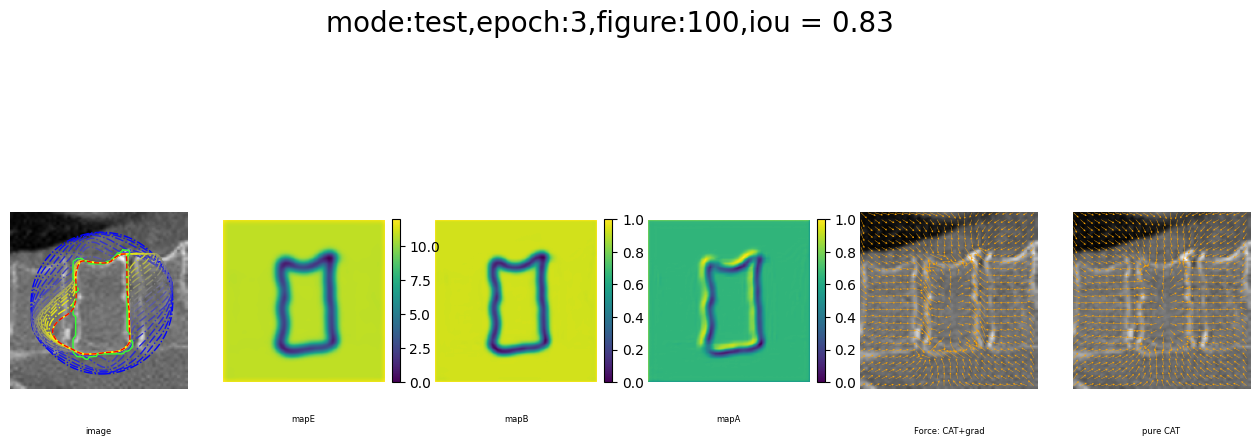

In [3]:
import os
import pickle

os.makedirs(save_dir, exist_ok=True)

save_imlist = []
for m in ims:
    if type(m) == range:
        save_imlist += list(m)
    else:
        save_imlist.append(m)
load_datalist = pickle.load(open(pklfile_dir, 'rb'))
print("读取数据文件：", pklfile_dir)
print("正在绘制的图片序号：", save_imlist)

for i in save_imlist:
    datainfo = load_datalist[i]
    draw_force_field = True
    if datainfo['gx'] is None: draw_force_field = False

    plot_result_drawer(save_dir + '/', datainfo['iou'], datainfo['epoch'], datainfo['imnum'], datainfo['status'],
                datainfo['snake_result'], datainfo['snake_result_list'], datainfo['GTContour'],
                datainfo['mapE'], datainfo['mapA'], datainfo['mapB'],
                datainfo['image'], plot_force=draw_force_field,
                gx=datainfo['gx'], gy=datainfo['gy'], Fu=datainfo['Fu'], Fv=datainfo['Fv'], alsosaveimg=also_save_img)